In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import tensorflow as tf
import os
import time
from sklearn.utils import shuffle
import datetime
from sklearn.cross_validation import train_test_split
from nolearn.lasagne import BatchIterator
%matplotlib inline

/Users/purvil12c/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
count=0
count_all=-1
keypoints_count=[0]*31
headings=[""]*31

image_x=[] #image pixel values
y=[] #keypoints data

In [3]:
with open('/Users/purvil12c/Desktop/Machine Learning/Dataset Facial/training.csv', 'r') as f:
    reader = csv.reader(f)
    count=0
    for row in reader:
        count=count+1
        i=0
        flag=0
        for item in row:
            if(count==1):
                headings[i]=item
            else:
                if(item!=''):
                    keypoints_count[i]+=1
                else:
                    flag=1
            i+=1
        if(flag==0 and count!=1):
            count_all+=1
            i=0
            temp=[]
            for item in row:
                if(i==30):
                    image_temp=item
                    image_temp=image_temp.replace(' ',',')
                    image_temp=np.fromstring(image_temp, sep=',')
                    #image_temp = np.reshape(image_temp, (96, 96))
                    image_x.append(image_temp)
                else:
                    temp.append(float(item))
                
                i+=1
            y.append(temp)       
            
        count+=1

In [4]:
for i in range(31):
    print(headings[i],keypoints_count[i])
print("Images with all attributes - ",count_all)

('left_eye_center_x', 7039)
('left_eye_center_y', 7039)
('right_eye_center_x', 7036)
('right_eye_center_y', 7036)
('left_eye_inner_corner_x', 2271)
('left_eye_inner_corner_y', 2271)
('left_eye_outer_corner_x', 2267)
('left_eye_outer_corner_y', 2267)
('right_eye_inner_corner_x', 2268)
('right_eye_inner_corner_y', 2268)
('right_eye_outer_corner_x', 2268)
('right_eye_outer_corner_y', 2268)
('left_eyebrow_inner_end_x', 2270)
('left_eyebrow_inner_end_y', 2270)
('left_eyebrow_outer_end_x', 2225)
('left_eyebrow_outer_end_y', 2225)
('right_eyebrow_inner_end_x', 2270)
('right_eyebrow_inner_end_y', 2270)
('right_eyebrow_outer_end_x', 2236)
('right_eyebrow_outer_end_y', 2236)
('nose_tip_x', 7049)
('nose_tip_y', 7049)
('mouth_left_corner_x', 2269)
('mouth_left_corner_y', 2269)
('mouth_right_corner_x', 2270)
('mouth_right_corner_y', 2270)
('mouth_center_top_lip_x', 2275)
('mouth_center_top_lip_y', 2275)
('mouth_center_bottom_lip_x', 7016)
('mouth_center_bottom_lip_y', 7016)
('Image', 7049)
('Images

In [5]:
#List to numpy array

image_x=np.asarray(image_x)
y=np.asarray(y)

#Normalising Image pixel values - 
image_x=image_x/255
y=(y-48)/48

In [6]:
print image_x.shape
image_x=np.reshape(image_x, (2140,96, 96,1))
print image_x.shape

(2140, 9216)
(2140, 96, 96, 1)


In [7]:
print type(image_x)
print image_x[0]

<type 'numpy.ndarray'>
[[[ 0.93333333]
  [ 0.9254902 ]
  [ 0.92941176]
  ..., 
  [ 0.98039216]
  [ 0.98039216]
  [ 0.98039216]]

 [[ 0.92156863]
  [ 0.93333333]
  [ 0.9254902 ]
  ..., 
  [ 0.97647059]
  [ 0.98039216]
  [ 0.98431373]]

 [[ 0.92941176]
  [ 0.9254902 ]
  [ 0.92941176]
  ..., 
  [ 0.98431373]
  [ 0.98431373]
  [ 0.98039216]]

 ..., 
 [[ 0.72941176]
  [ 0.71764706]
  [ 0.70980392]
  ..., 
  [ 0.20392157]
  [ 0.22352941]
  [ 0.23529412]]

 [[ 0.74117647]
  [ 0.7372549 ]
  [ 0.81176471]
  ..., 
  [ 0.23921569]
  [ 0.27058824]
  [ 0.30588235]]

 [[ 0.74901961]
  [ 0.72156863]
  [ 0.72156863]
  ..., 
  [ 0.2745098 ]
  [ 0.29411765]
  [ 0.35294118]]]


In [8]:
print type(y)

<type 'numpy.ndarray'>


In [9]:
print y[0]

[ 0.37569925 -0.18745263 -0.37027068 -0.24121504  0.24129323 -0.17401203
  0.52354887 -0.16729173 -0.24257143 -0.22105414 -0.5113985  -0.22105414
  0.18652632 -0.39513233  0.6713985  -0.32858045 -0.16192481 -0.39578496
 -0.65924211 -0.38234436 -0.07457143  0.18889173  0.27490226  0.66604511
 -0.40386466  0.61227068 -0.09765414  0.51948872 -0.10144361  0.7601203 ]


In [10]:
def plotSample(image,y,y_correct,check):
    image=image.reshape(96, 96)
    plt.imshow(image,zorder=0,cmap='gray')
    i=0
    while i!=30:
        plt.scatter(y[i]*48 + 48,y[i+1]*48 + 48,10,c='W',zorder=1)#(x,y,size,color,zorder)
        i=i+2
    i=0
    if(check==True):
        while i!=30:
            plt.scatter(y_correct[i]*48 + 48,y_correct[i+1]*48 + 48,10,c='r',zorder=2)#(x,y,size,color,zorder)
            i=i+2
    print(check)

False


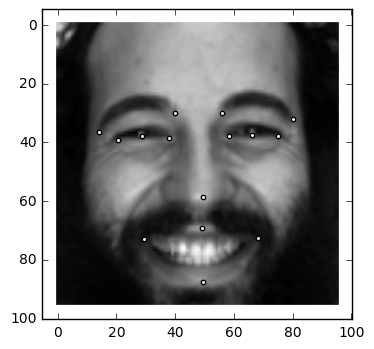

In [11]:
image_x, y = shuffle(image_x, y, random_state=42) #Shuffling the deck of images
plotSample(image_x[0],y[0],[],False)

In [24]:
#constants - 
image_size=96
num_keypoints=30
batch_size=36
num_epochs=500
learning_rate = 0.01
momentum = 0.9
num_hidden_layer_1=1000
num_channels = 1

dropout = True


model_name = "1fc_b" + str(batch_size) + "_e" + str(num_epochs - 1)
model_variable_scope = model_name

In [14]:
x_train, x_test, y_train, y_test = train_test_split(image_x, y, test_size = 0.2)
print x_train.shape
print image_x.shape

(1712, 96, 96, 1)
(2140, 96, 96, 1)


In [15]:
def fully_connected(input, size):
    
    #fully connected layer. Each node of layer before connected to every node of layer after.
    #input = tensor input, size = number of nodes in fully connected layer required.
    
    weights = tf.get_variable( 'weights', 
        shape = [input.get_shape()[1], size],
        initializer = tf.contrib.layers.xavier_initializer() #tf.contrib.layers.xavier_initializer() #xavier initializer - https://prateekvjoshi.com/2016/03/29/understanding-xavier-initialization-in-deep-neural-networks/
      )
    biases = tf.get_variable( 'biases',
        shape = [size],
        initializer=tf.constant_initializer(0.0) #all biases are 0 initially
      )
    return tf.matmul(input, weights) + biases
    #returns (input*weights + biases) i.e., output of layer.

def fully_connected_relu(input, size):
    return tf.nn.relu(fully_connected(input, size)) #performs relu. replaces -ve numbers by 0.

def conv_relu(input, kernel_size, depth):
    #depth is number of nodes.
    #kernel size is the dimension of frame used for convolution
    weights = tf.get_variable( 'weights', 
        shape = [kernel_size, kernel_size, input.get_shape()[3], depth],
        initializer = tf.contrib.layers.xavier_initializer()
      )
    biases = tf.get_variable( 'biases',
        shape = [depth],
        initializer=tf.constant_initializer(0.0)
      )
    conv = tf.nn.conv2d(input, weights,
        strides=[1, 1, 1, 1], padding='SAME') 
    return tf.nn.relu(conv + biases) #replacing -ve numbers by 0 = ReLU.

def pool(input, size):
    #Does Max_Pooling. Selects the maximum values.
    return tf.nn.max_pool(
        input, 
        ksize=[1, size, size, 1], 
        strides=[1, size, size, 1], 
        padding='SAME'
    )


In [16]:
def calc_loss(predictions, labels):
    #calculates loss between actual and predicted.
    return np.mean(np.square(predictions - labels))

In [17]:
def convolutional_neural_net(data, training):
    #Data is the input of images used to train the neural net. 
    #training is a boolean use to detect where training the net or not. True for training.
    
    # Convolutional layers
    with tf.variable_scope('conv1'):
        conv1 = conv_relu(data, kernel_size = 3, depth = 32) 
        pool1 = pool(conv1, size = 2)
        # Apply dropout if needed
        #pool1 = tf.cond(training, lambda: tf.nn.dropout(pool1, keep_prob = 0.9 if dropout else 1.0), lambda: pool1)
    with tf.variable_scope('conv2'):
        conv2 = conv_relu(pool1, kernel_size = 2, depth = 64)
        pool2 = pool(conv2, size = 2)
        # Apply dropout if needed
        #pool2 = tf.cond(training, lambda: tf.nn.dropout(pool2, keep_prob = 0.8 if dropout else 1.0), lambda: pool2)
    with tf.variable_scope('conv3'):
        conv3 = conv_relu(pool2, kernel_size = 2, depth = 128)
        pool3 = pool(conv3, size = 2)
        # Apply dropout if needed
        #pool3 = tf.cond(training, lambda: tf.nn.dropout(pool3, keep_prob = 0.7 if dropout else 1.0), lambda: pool3)
    
    # Flatten convolutional layers output
    shape = pool3.get_shape().as_list()
    flattened = tf.reshape(pool3, [-1, shape[1] * shape[2] * shape[3]])
    
    # Fully connected layers
    with tf.variable_scope('fc4'):
        fc4 = fully_connected_relu(flattened, size = 1000)
        # Apply dropout if needed
        #fc4 = tf.cond(training, lambda: tf.nn.dropout(fc4, keep_prob = 0.5 if dropout else 1.0), lambda: fc4)
    with tf.variable_scope('fc5'):
        fc5 = fully_connected_relu(fc4, size = 1000)
    with tf.variable_scope('out'):
        prediction = fully_connected(fc5, size = num_keypoints)
    return prediction

In [18]:
graph = tf.Graph()

with graph.as_default():
    # Input data. For the training data, we use a placeholder that will be fed at run time with a training minibatch.
    tf_x_batch = tf.placeholder(tf.float32, shape = (None, image_size, image_size, num_channels))
    tf_y_batch = tf.placeholder(tf.float32, shape = (None, num_keypoints))
    is_training = tf.placeholder(tf.bool)
    current_epoch = tf.Variable(0)  # count the number of epochs
    
    # Training computation.
    with tf.variable_scope(model_variable_scope):
        predictions = convolutional_neural_net(tf_x_batch, is_training)
    
    loss = tf.reduce_mean(tf.square(predictions - tf_y_batch))

    # Optimizer.
    optimizer = tf.train.MomentumOptimizer(
        learning_rate = learning_rate, 
        momentum = momentum, 
        use_nesterov = True
    ).minimize(loss)

In [19]:
def get_predictions_in_batches(X, session):
    #This function gets prediction in batches.
    
    p = []
    batch_iterator = BatchIterator(batch_size = 128)
    for x_batch, _ in batch_iterator(X):
        [p_batch] = session.run([predictions], feed_dict = {
                tf_x_batch : x_batch,
                is_training : False
            }
        )
        p.extend(p_batch)
    return p

In [25]:
# predict=[]
with tf.Session(graph = graph) as session:
    session.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    
    train_loss_history=[]
    test_loss_history=[]
    
    import os.path
    if os.path.exists("/users/purvil12c/modelcnn500.ckpt"):
        saver.restore(session, "/users/purvil12c/modelcnn500.ckpt")
    print("Training NOW!")
    for epoch in range(num_epochs):
        
        start_time = datetime.datetime.now()
        
        batch_iterator = BatchIterator(batch_size=batch_size,shuffle = True)
        for x_batch, y_batch in batch_iterator(x_train,y_train):
            session.run([optimizer],feed_dict = { tf_x_batch : x_batch, tf_y_batch : y_batch})
            
         
        train_loss = calc_loss(get_predictions_in_batches(x_train,session),y_train)
           
        predict=get_predictions_in_batches(x_test,session)
        test_loss=calc_loss(predict,y_test)
        
        end_time = datetime.datetime.now()
        
        start_time_str = ""+str(start_time.hour)+"H:"+str(start_time.minute)+"M:"+str(start_time.second)+"S"
        end_time_str = ""+str(end_time.hour)+"H:"+str(end_time.minute)+"M"+str(end_time.second)+"S"
    
        print("EPOCH ",epoch," Train Loss ",train_loss," Test Loss ",test_loss,"Start_Time : ",start_time_str," End_Time : ",end_time_str)
        
        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)
        
        correct = tf.equal(tf.argmax(predictions,1),tf.argmax(tf_y_batch,1))
        accuracy=tf.reduce_mean(tf.cast(correct,'float'))
        save_path = saver.save(session, "/Users/purvil12c/modelcnn500.ckpt")
        print("Model saved in file: %s" % save_path)
    
    print("Accuracy is = ",accuracy.eval(feed_dict={tf_x_batch:x_test,tf_y_batch:y_test}))
    
        
        

Training NOW!
('EPOCH ', 0, ' Train Loss ', 0.007490395993304714, ' Test Loss ', 0.0081432047654241852, 'Start_Time : ', '16H:39M:50S', ' End_Time : ', '16H:40M29S')
Model saved in file: /Users/purvil12c/modelcnn500.ckpt
('EPOCH ', 1, ' Train Loss ', 0.006327481420433898, ' Test Loss ', 0.0069325586690971476, 'Start_Time : ', '16H:40M:31S', ' End_Time : ', '16H:41M11S')
Model saved in file: /Users/purvil12c/modelcnn500.ckpt
('EPOCH ', 2, ' Train Loss ', 0.0056919307169052049, ' Test Loss ', 0.006201317177927464, 'Start_Time : ', '16H:41M:13S', ' End_Time : ', '16H:41M52S')
Model saved in file: /Users/purvil12c/modelcnn500.ckpt
('EPOCH ', 3, ' Train Loss ', 0.0052649824391570845, ' Test Loss ', 0.0057453717567338223, 'Start_Time : ', '16H:41M:54S', ' End_Time : ', '16H:42M33S')
Model saved in file: /Users/purvil12c/modelcnn500.ckpt
('EPOCH ', 4, ' Train Loss ', 0.0049670680267136624, ' Test Loss ', 0.0054812399031847333, 'Start_Time : ', '16H:42M:35S', ' End_Time : ', '16H:43M14S')
Mode

In [26]:
#SAVING TEST LOSS AND TRAIN LOSS FOR EACH EPOCH IN FILE.

print train_loss_history
print test_loss_history

file1 = open('train_loss_history500.txt', 'a')
file2 = open('test_loss_history500.txt', 'a')
for item in train_loss_history:
    file1.write("%s\n" % item)
for item in test_loss_history:
    file2.write("%s\n" % item)

[0.007490395993304714, 0.006327481420433898, 0.0056919307169052049, 0.0052649824391570845, 0.0049670680267136624, 0.0047368092316815592, 0.0045749354529866938, 0.0044562114086026455, 0.004359711285052169, 0.0042954916089514641, 0.0042441483198380325, 0.0042182865992186208, 0.0041904390753875415, 0.0041783983029651103, 0.0041274800363250074, 0.004128743340175928, 0.0041090448727375628, 0.0040814299616635146, 0.0040749714729052255, 0.0040500212896970485, 0.0040264802717190967, 0.0040113064234562779, 0.0039897680911583321, 0.0039792178483632678, 0.003954402275970173, 0.0039642016558914875, 0.0039322694150811261, 0.0039082122199865484, 0.0038938440337093062, 0.0038911390986472233, 0.0038830628561065533, 0.0038438027057273306, 0.0038211671593248765, 0.003812223466962385, 0.0038209575323197142, 0.0037715824542280617, 0.0037550015546443435, 0.0037342089111125085, 0.003729945197174516, 0.0036988693081112215, 0.0036891099907085307, 0.0036699851865443912, 0.0036526633166723598, 0.003641484963341

500


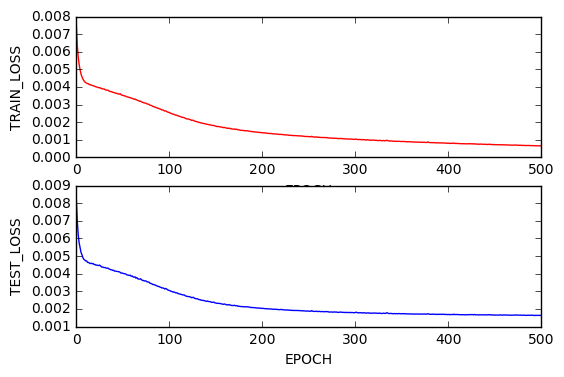

In [28]:
#PLOTTING TRAIN AND TEST LOSS
train_list_loss=[]
test_list_loss=[]
with open("train_loss_history500.txt") as file1:
    train_list_loss=file1.read()
    
train_list_loss = train_list_loss.split()
#print train_list_loss

with open("test_loss_history500.txt") as file2:
    test_list_loss=file2.read()
    
test_list_loss = test_list_loss.split()

train_list_loss = list(map(float, train_list_loss))
test_list_loss = list(map(float, test_list_loss))

print len(test_list_loss)
x = np.arange(500)
y_train_arr = np.asarray(train_list_loss)
y_test_arr = np.asarray(test_list_loss)


plt.figure(1)
plt.subplot(211)
plt.xlabel('EPOCH')
plt.ylabel('TRAIN_LOSS')
plt.plot(x, y_train_arr, 'r')

plt.subplot(212)
plt.plot(x, y_test_arr, 'b')
plt.ylabel('TEST_LOSS')
plt.xlabel('EPOCH')
plt.show()

In [125]:
from PIL import Image
im1 = Image.open("/Users/purvil12c/Desktop/Untitled-1.jpg") #Can be many different formats.
pix1 = im1.load()
print im1.size #Get the width and hight of the image for iterating over

pixel_values1 = []
for i in range(96):
    for j in range(96):
        
        avg=(pix1[j,i][0] + pix1[j,i][1] + pix1[j,i][2])/3
        pixel_values1.append(avg)
        
print len(pixel_values1)
img1=np.array(pixel_values1)
img1=img1/255.0
print img1

im2 = Image.open("/Users/purvil12c/Desktop/Untitled-2.jpg") #Can be many different formats.
pix2 = im2.load()
print im2.size #Get the width and hight of the image for iterating over

pixel_values2 = []
for i in range(96):
    for j in range(96):
        
        avg=(pix2[j,i][0] + pix2[j,i][1] + pix2[j,i][2])/3
        pixel_values2.append(avg)
        
print len(pixel_values2)
img2=np.array(pixel_values2)
img2=img2/255.0
print img2

im3 = Image.open("/Users/purvil12c/Desktop/Untitled-3.jpg") #Can be many different formats.
pix3 = im3.load()
print im3.size #Get the width and hight of the image for iterating over

pixel_values3 = []
for i in range(96):
    for j in range(96):
        
        avg=(pix3[j,i][0] + pix3[j,i][1] + pix3[j,i][2])/3
        pixel_values3.append(avg)
        
print len(pixel_values3)
img3=np.array(pixel_values3)
img3=img3/255.0
print img3

(96, 96)
9216
[ 0.69803922  0.69411765  0.69411765 ...,  0.08627451  0.09411765
  0.10980392]
(96, 96)
9216
[ 0.99607843  0.99607843  0.99607843 ...,  1.          1.          0.99607843]
(96, 96)
9216
[ 0.65098039  0.65098039  0.63529412 ...,  0.96078431  0.96470588
  0.96470588]


In [126]:
img = []
img.append(img1)
img.append(img2)
img.append(img3)
img = np.asarray(img)
img = np.reshape(img,(len(img),96,96,1))

In [127]:
with tf.Session(graph = graph) as session:
    saver = tf.train.Saver()
    saver.restore(session, "/users/purvil12c/modelcnn500.ckpt")
    predict2=get_predictions_in_batches(img,session)
    predict=get_predictions_in_batches(x_test,session)

False


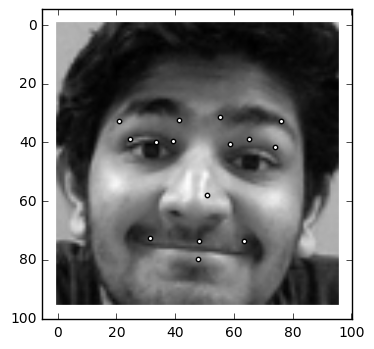

In [128]:
plotSample(img[0],predict2[0],[],False)


False


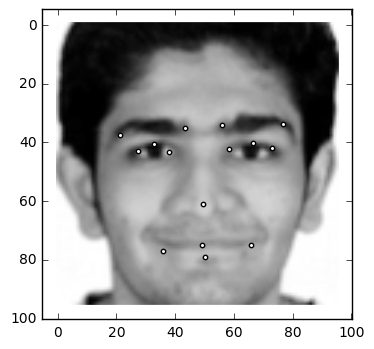

In [129]:
plotSample(img[1],predict2[1],[],False)

False


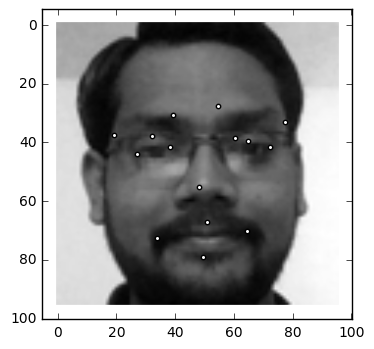

In [130]:
plotSample(img[2],predict2[2],[],False)

[ 0.31145431 -0.24144144 -0.36653797 -0.23680824  0.14671815 -0.19305019
  0.48488031 -0.22969369 -0.20849421 -0.19150579 -0.54769627 -0.21847104
  0.12213029 -0.37969449  0.5058029  -0.40779684 -0.2230649  -0.36496445
 -0.68425593 -0.36724441 -0.03465802  0.19139916  0.31981982  0.44774775
 -0.34684685  0.45630631 -0.02293694  0.48336036 -0.02207207  0.51171171]
True


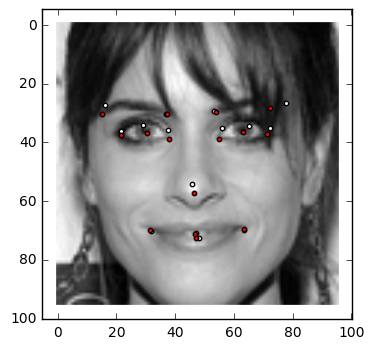

In [103]:
print y_test[1]
plotSample(x_test[1],predict[1],y_test[1],True)


True


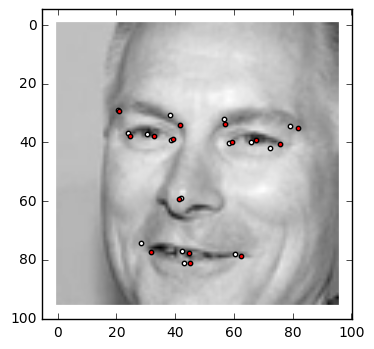

In [104]:
plotSample(x_test[65],predict[65],y_test[65],True)

True


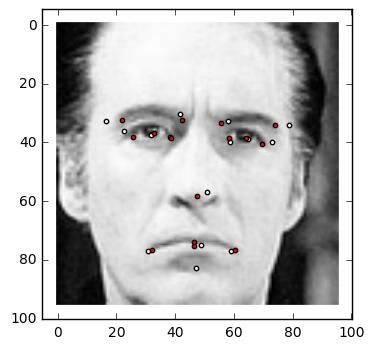

In [105]:
plotSample(x_test[11],predict[11],y_test[11],True)

True


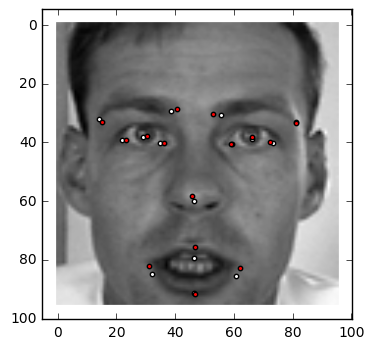

In [106]:
plotSample(x_test[20],predict[20],y_test[20],True)

True


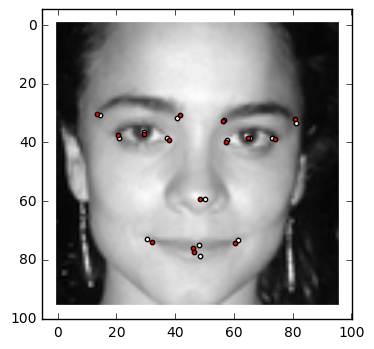

In [107]:
plotSample(x_test[15],predict[15],y_test[15],True)

True


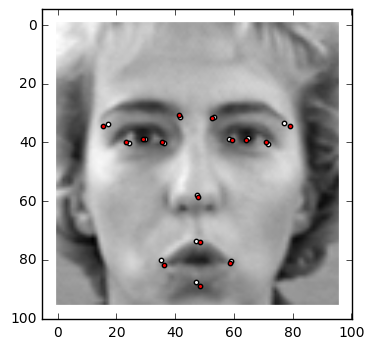

In [108]:
plotSample(x_test[59],predict[59],y_test[59],True)

True


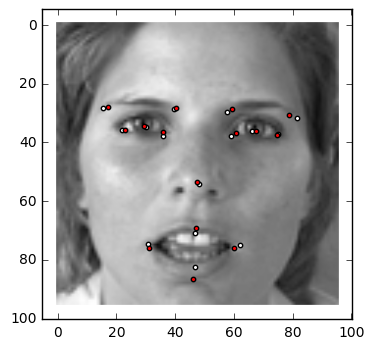

In [109]:
plotSample(x_test[109],predict[109],y_test[109],True)

True


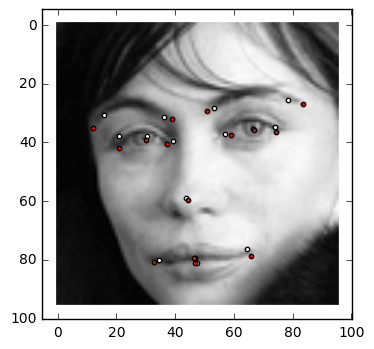

In [132]:
plotSample(x_test[39],predict[39],y_test[39],True)